In [1]:
import numpy as np
from scipy import stats

def gen_sindata(n=2):
    x = stats.uniform(-1,2) # define random variable
    v = x.rvs((n,1)) # generate sample
    y = np.sin(np.pi*v) # use sample for sine
    return (v,y)

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False) # the line is centered
X, y = gen_sindata(200)  # 200 points
lr.fit(X,y) # fit the line
lr.coef_ # the slope

array([[1.03283393]])

Text(0.5, 1.0, '$a=1.03$')

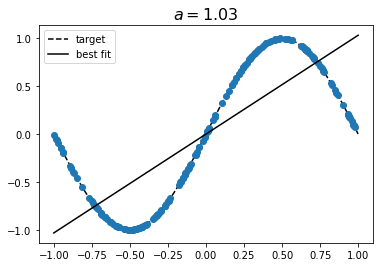

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
xi= np.linspace(-1,1,50) # from -1 to 1, 50 points
yi= np.sin(np.pi*xi) # sine wave
y_pred = lr.predict(xi.reshape(-1,1)) # predict

plt.plot(xi, yi,'--k',label='target')
plt.plot(X, y, 'o')
plt.plot(xi, y_pred, c='k', label='best fit')
plt.legend(loc='best')
plt.title('$a=%3.3g$'%(lr.coef_),fontsize=16)

In [4]:
a_out=[] # output container
for i in range(100000):
    X, y = gen_sindata(200)  # 200 points
    lr.fit(X,y)
    y_pred = lr.predict(xi.reshape(-1,1))
    a_out.append(lr.coef_[0,0])
a_bar = np.mean(a_out) 
a_var = np.var(a_out) 

In [5]:
print (a_bar, a_var)

0.9578467626349384 0.0038971445575332843


Text(0.5, 1.0, '$a_{bar}=0.958$, $a_{var}=0.0039$')

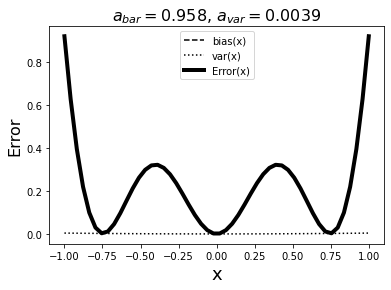

In [6]:
xi= np.linspace(-1,1,50)
yi= np.sin(np.pi*xi)

plt.plot(xi,(a_bar*xi-yi)**2,'--k',label='bias(x)')
plt.plot(xi,(a_var)*(xi)**2,':k',label='var(x)') # var = E[x], (a**2)*var = E[a**2*x+b]
plt.plot(xi,((a_bar*xi-yi)**2 + a_var*(xi)**2),'-k',lw = 4, label='Error(x)')
plt.legend(loc='best')
plt.xlabel('x', fontsize=18)
plt.ylabel('Error',fontsize=16)
plt.title('$a_{bar}=%3.3g$, $a_{var}=%3.3g$'%(a_bar,a_var),fontsize=16)